## Name : - Siddhartha Seelam
## Task4 : - Exploratory Data Analysis - Terrorism
## Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’ & To find out: -
### - The hot zone of terrorism.
### - What all security issues and insights you can derive by EDA?

### __ Importing Libraries __

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
import plotly.express as px

### __ Loading Dataset __

In [3]:
df=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')

/home/sid/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [5]:
df.info() #detialed information about the imported 'df'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [6]:
#stratigical display of the data
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#to print no. of rows and columns in the dataset for better understanding
df.shape 

(181691, 135)

In [8]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [9]:
df.columns #check the columns in the data

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [10]:
corr=df.corr()
corr  # correlation pf the data

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999996,0.002706,0.018336,0.091761,-0.135039,0.401371,0.166886,0.003907,0.030641,...,-0.009990,-0.018001,-0.014094,-0.165422,0.256113,-0.181612,-0.143600,-0.133252,-0.077852,-0.175605
iyear,0.999996,1.000000,0.000139,0.018254,0.091754,-0.135023,0.401384,0.166933,0.003917,0.030626,...,-0.009984,-0.018216,-0.014238,-0.165375,0.256092,-0.181556,-0.143601,-0.133253,-0.077847,-0.175596
imonth,0.002706,0.000139,1.000000,0.005497,-0.000468,-0.006305,-0.002999,-0.015978,-0.003880,0.003621,...,-0.000710,0.046989,0.058878,-0.016597,0.011295,-0.011535,-0.002302,-0.002034,-0.002554,-0.006336
iday,0.018336,0.018254,0.005497,1.000000,-0.004700,0.003468,0.009710,0.003423,-0.002285,-0.006991,...,0.012755,-0.010502,0.003148,-0.006581,-0.006706,0.001765,-0.001540,-0.001621,-0.002027,-0.001199
extended,0.091761,0.091754,-0.000468,-0.004700,1.000000,-0.020466,0.038389,-0.024749,0.000523,0.057897,...,-0.008114,0.028177,0.001966,0.009367,0.233293,-0.192155,0.071768,0.075147,0.027335,0.080767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nreleased,-0.181612,-0.181556,-0.011535,0.001765,-0.192155,-0.044331,-0.149511,0.002790,-0.017745,-0.030631,...,0.054571,0.034843,0.049322,0.016832,-0.555478,1.000000,0.039388,0.040947,0.085055,0.064759
INT_LOG,-0.143600,-0.143601,-0.002302,-0.001540,0.071768,0.069904,-0.082584,-0.099827,0.002272,0.073022,...,0.035821,0.031079,0.007029,-0.045504,-0.015442,0.039388,1.000000,0.996211,0.052537,0.891051
INT_IDEO,-0.133252,-0.133253,-0.002034,-0.001621,0.075147,0.067564,-0.071917,-0.094470,0.002268,0.071333,...,0.039053,0.041983,0.013162,-0.039844,-0.016234,0.040947,0.996211,1.000000,0.082014,0.893811
INT_MISC,-0.077852,-0.077847,-0.002554,-0.002027,0.027335,0.207281,0.043139,0.097652,0.000371,-0.019197,...,0.023815,0.125162,0.037227,0.129274,-0.119776,0.085055,0.052537,0.082014,1.000000,0.252193


### __ Data Visualization __

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc4fa3761c0>,
      dtype=object)

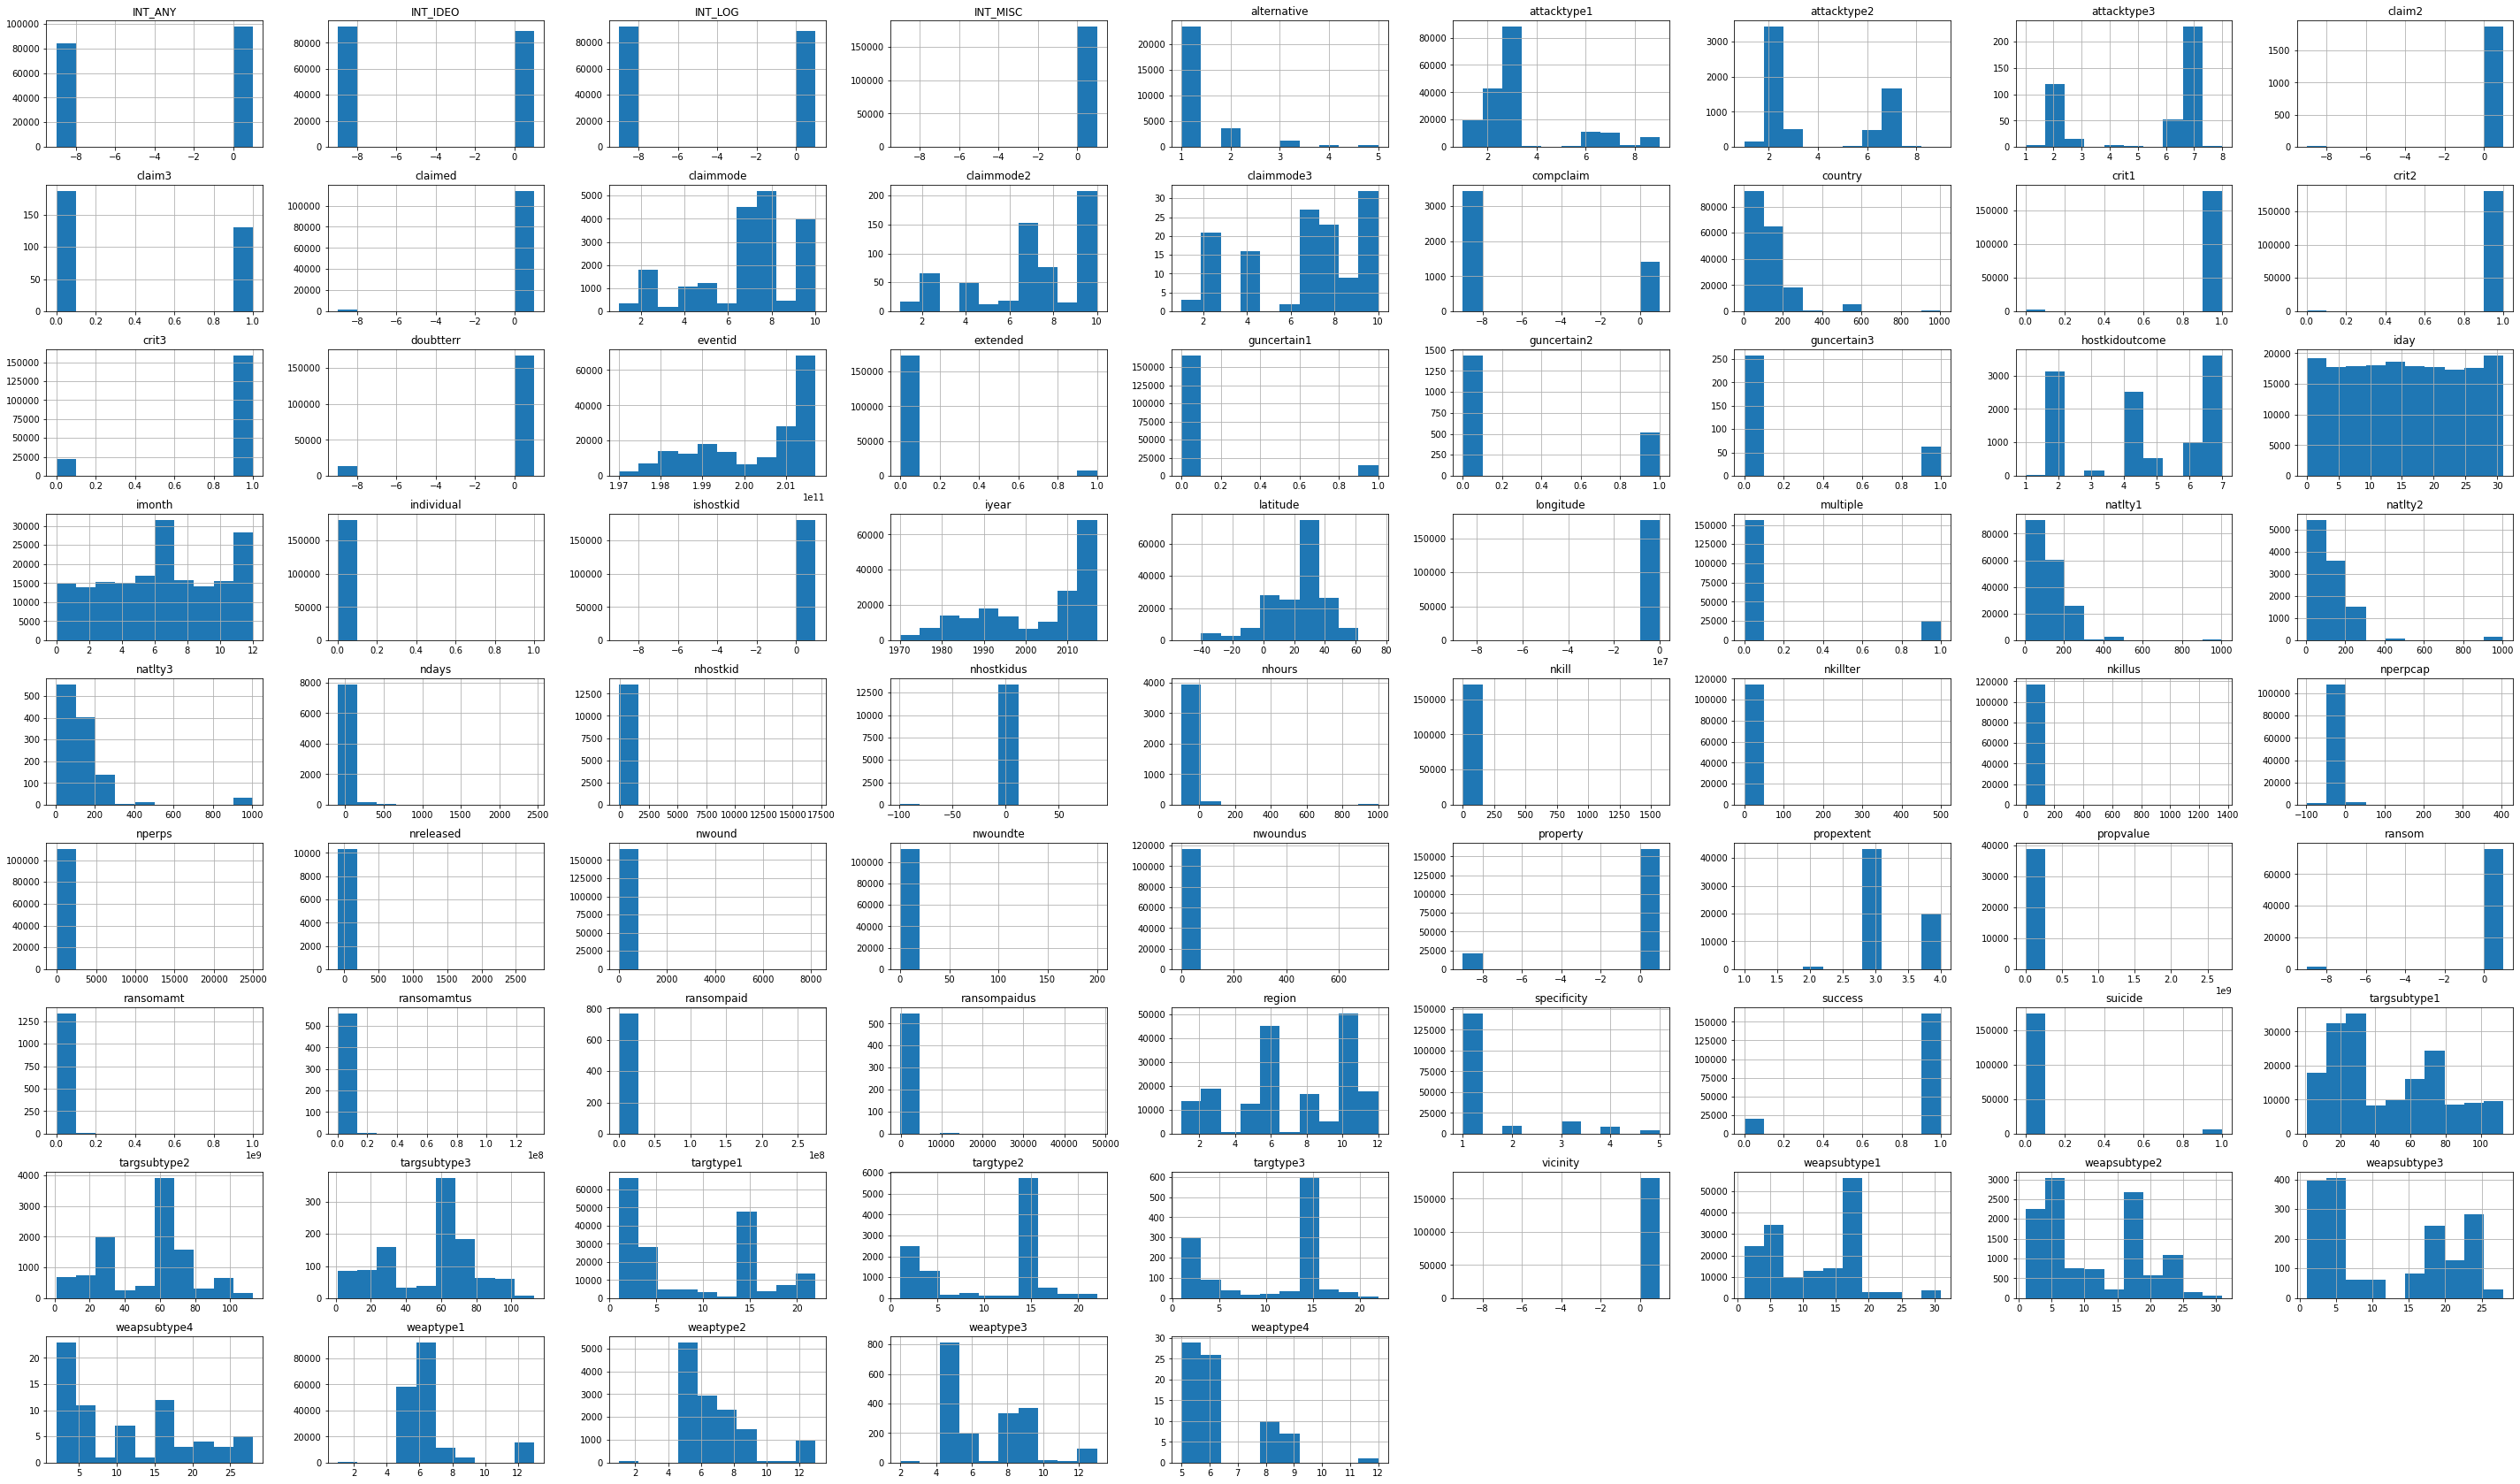

In [11]:
df.hist(figsize=(50,30))

### __ Checking which region has highest attacks & in which year __

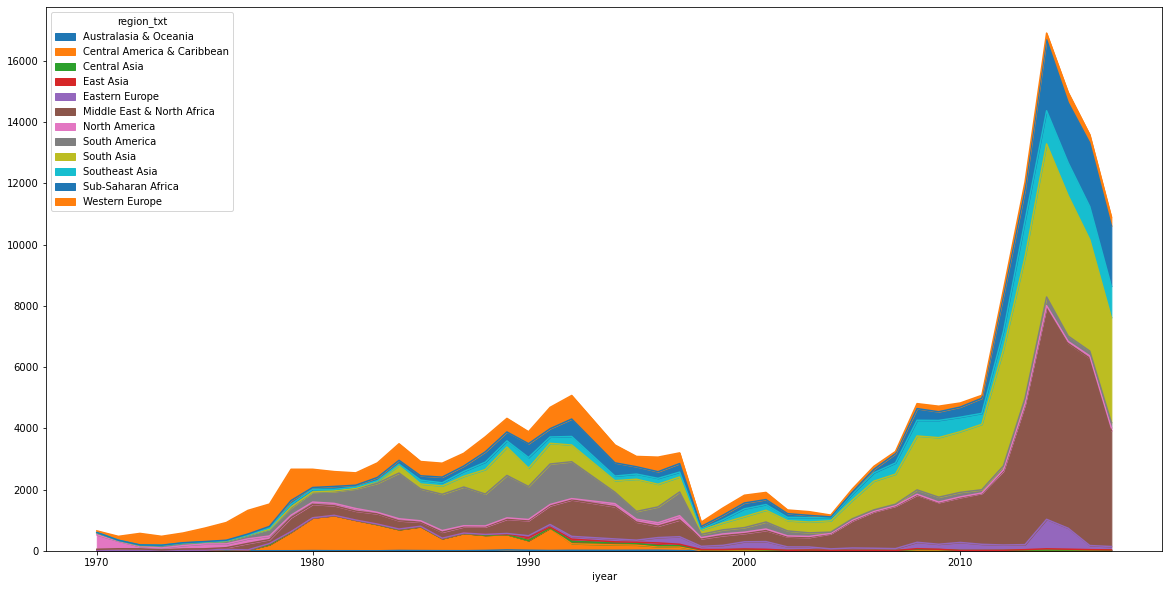

In [12]:
#Graphical representation of terrorist activities by region
pd.crosstab(df.iyear,df.region_txt).plot(kind='area',figsize=(20,10))
plt.show()

### __ To count No.of attacks __

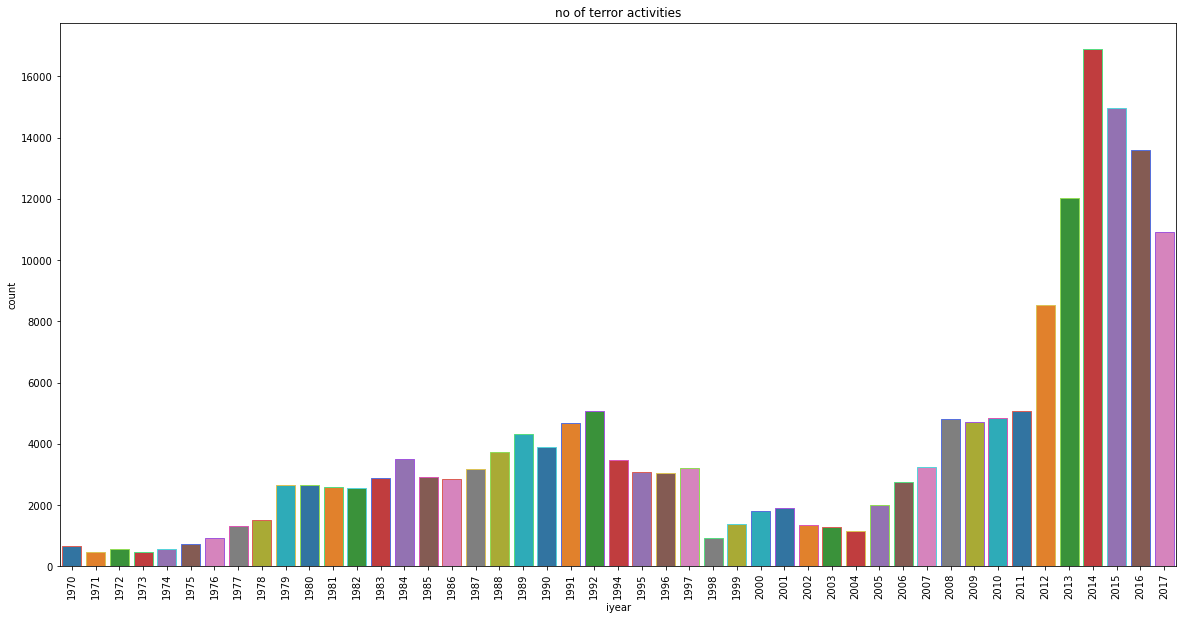

In [13]:
plt.subplots(figsize=(20,10))
sns.countplot('iyear',data=df,palette='tab10',edgecolor=sns.color_palette("hls", 8))
plt.xticks(rotation=90)
plt.title('no of terror activities')
plt.show()

* From this we can say that the there has been a significant increase number of attacks fron 1970 to 2017

### __ Highest number of attacks took place in year 2014 __

In [14]:
yr=df.iyear.value_counts().to_dict()
rate=((yr[2017]-yr[1970])/yr[2017])*100
print('number of attacks in year 2017 is',yr[2017],' and number of attacks in year 1970 is',yr[1970])

number of attacks in year 2017 is 10900  and number of attacks in year 1970 is 651


### __ The Type of Attack that has been used the Most __

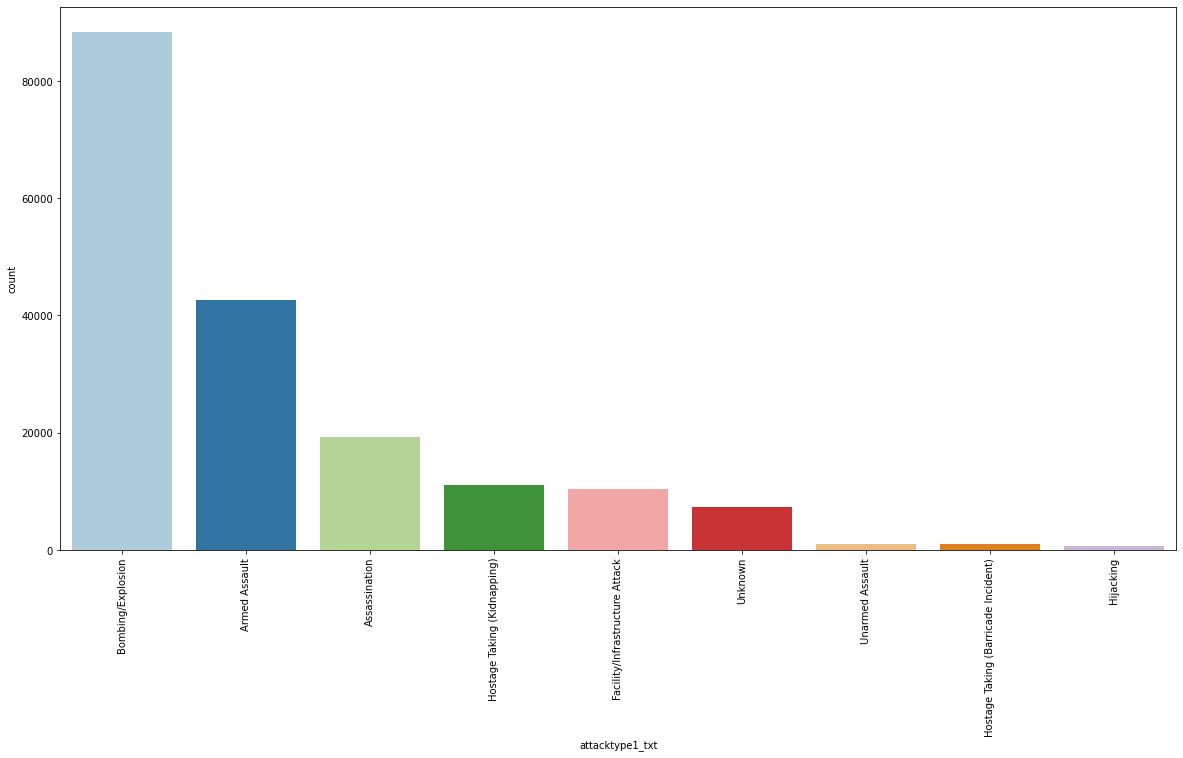

In [15]:
plt.figure(figsize=(20,10))
sns.countplot(df['attacktype1_txt'],order=df['attacktype1_txt'].value_counts().index,palette='Paired')
plt.xticks(rotation=90)
plt.show()

* Bombing/Explosion have been used the most, more than 80000 times

### __ Type of Places that have been Targeted the Most __

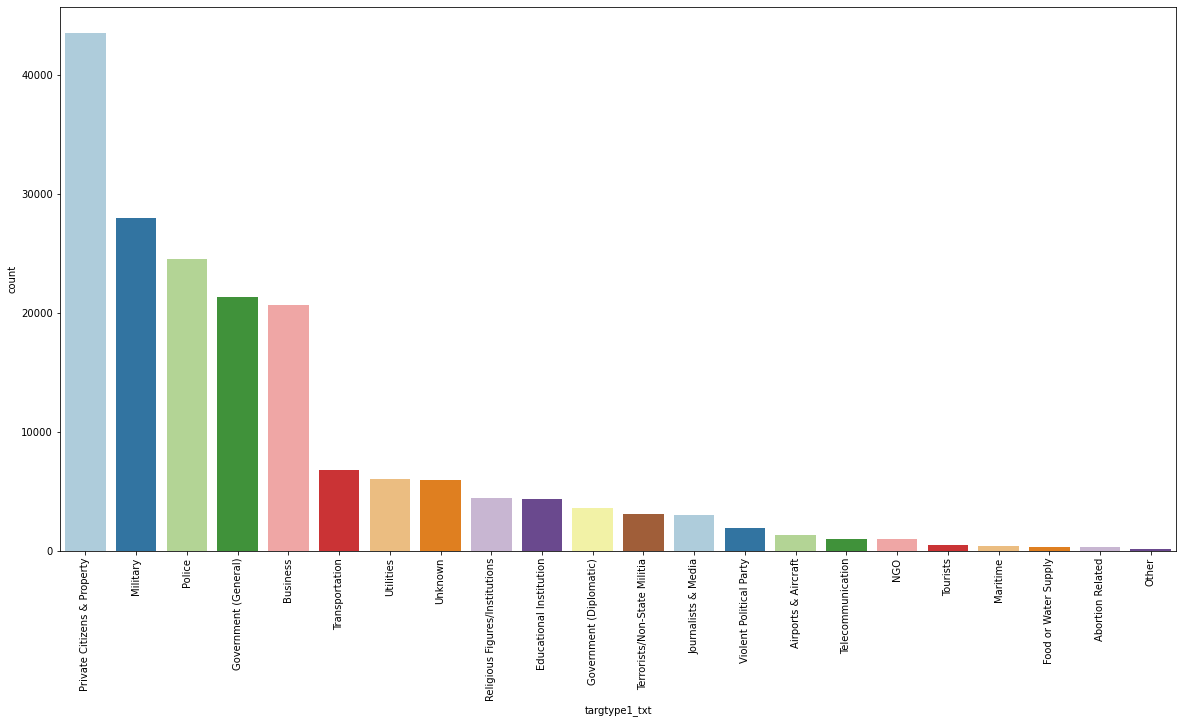

In [16]:
plt.figure(figsize=(20,10))
sns.countplot(df['targtype1_txt'],order=df['targtype1_txt'].value_counts().index,palette='Paired')
plt.xticks(rotation=90)
plt.show()

* Private citizens & Property has been targeted the most, more than 40000 time.

###  __The countries that are the most under attack __

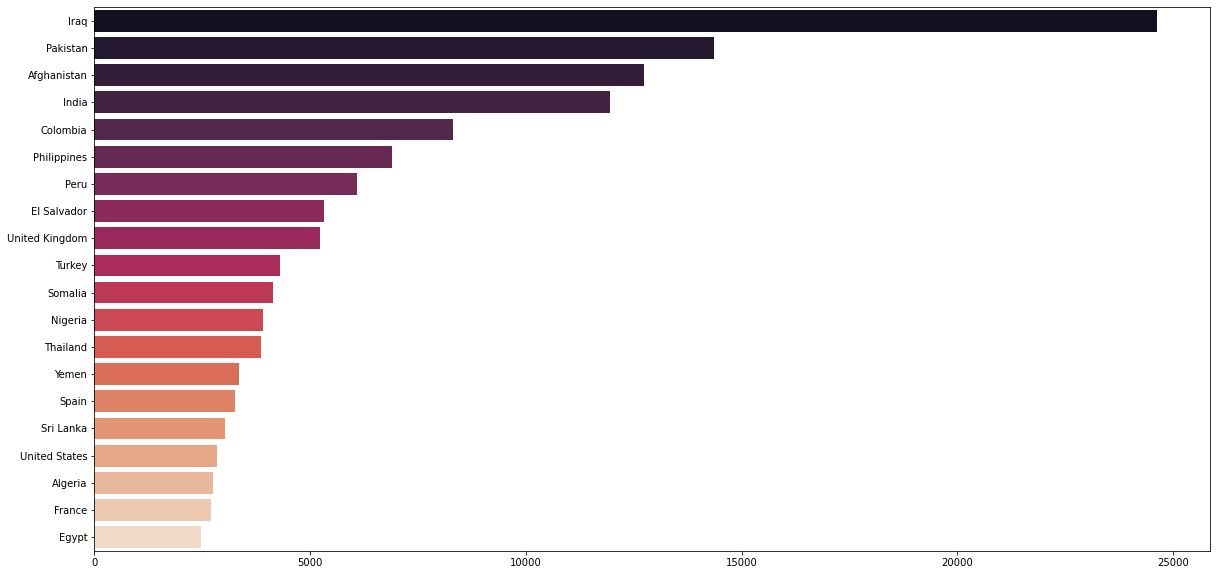

In [17]:
fig,axes=plt.subplots(figsize=(20,10),nrows=1,ncols=1)
sns.barplot(x=df['country_txt'].value_counts()[:20].values,y=df['country_txt'].value_counts()[:20].index,palette='rocket')

* Country that faces most number of terror attacks is Iraq, about 25000

### __ Regions that are most under attack __

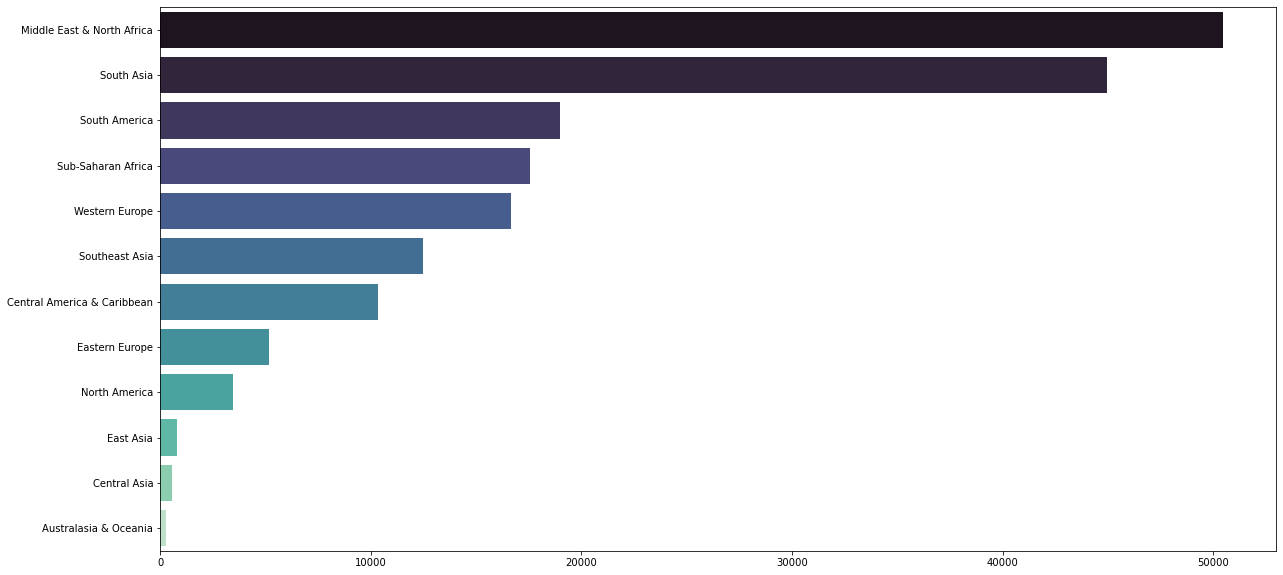

In [18]:
fig,axes=plt.subplots(figsize=(20,10),nrows=1,ncols=1)
sns.barplot(x=df['region_txt'].value_counts()[:20].values,y=df['region_txt'].value_counts()[:20].index,palette='mako')

* The region that is most under attack is Middle East and North Africa with more than 50000 attacks

### __ Analysis on Customized Data __
#### __ Terror attacks in a location/country in particular year __

In [19]:
filterYear = df['iyear'] == 1970

In [20]:
filterData=df[filterYear]

In [21]:
filterData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 0 to 650
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 691.7+ KB


In [22]:
reqFilterData = filterData.loc[:,'city':'longitude']
reqFilterData=reqFilterData.dropna() #remove null values

In [23]:
reqFilterDataList=reqFilterData.values.tolist()

In [27]:
map=folium.Map(location=[0,30],tiles='CartoDB positron',zoom_start=2)

In [28]:
#clustered marker
markerCluster= folium.plugins.MarkerCluster().add_to(map)
for point in range (0, len(reqFilterDataList)):
  folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]],popup=reqFilterDataList[point][0]).add_to(map)

In [32]:
map

### __ Total number of people killed in terror attacks __

In [30]:
killData=df.loc[:,'nkill']
killData=killData.dropna() #remove null values

In [31]:
print('Number of people killed in terror attacks',int(sum(killData)))

Number of people killed in terror attacks 411868


## Q1. As a security/defense analyst, try to find out the hot zone of terrorism?
### - Hot zone of global terrorism is found at " Iraq ".

## Q2. What all security issues and insights you can derive by EDA?

### - Security Issues
* Inter country travelling without proper checking of documents.
* Illegal and illogical selling of firearms and explosives.
* Lack of police protection and patroling at residential areas.
* Lack of good child security forces.
* Political turmoil at certain major countries.


### - Insights
* Highest number of terrorism cases were recorded after 2010.
* Iraq has the highest number of terrorism cases, being a state in political turmoil.
* Alternative terms of terrorism at most countries is insurgency and guerilla action
* Attack types are bombing explosion , armed assault , facililty/infrastructure attack
* Most common target subsets are - private properties , citizens
* The claim of attack is made personally - personal claim
* The most common weapon types are - explosives then firearms Their subtypes being unknown
* The number of people killed lies between 0 and 100. Most countries having 0 attacks.
* The property value of disputed property is - less than 1 million
* Maximum cases don't involve kids.